In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# common parameters
Cap=1
GK=1.44
Eleak=-54
km=7

# define gating variables
def m_inf(V):
    return 1/(1+np.exp((-40-V)/km))
def n_inf(V,Vn,kn):
    return 1/(1+np.exp((Vn-V)/kn))

# Scipy solver

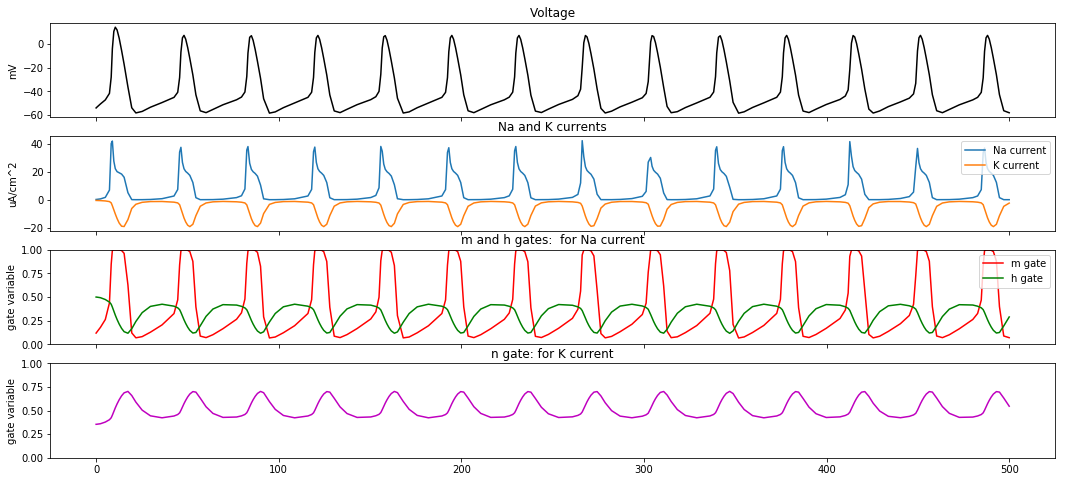

In [8]:
# simulation time
simtime=500  # in msec


paramset=1
Iinput=2
# relevant ranges:
#  paramset1:  [0 to 4.  it starts saturating above that]
#  paramset2:  same.  but this one has a sharp transition somewhere, after 2

if paramset==1:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.2,50,-77,-45,15,10
elif paramset==2:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.35,65,-90,-40,5,10
elif paramset==3:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 0.25,0.012,30,-77,-44,10,50
else:
    print("wrong paramset number! \n")

    
def dV_and_dn(t,y):
    # this takes in y=[V,n], and returns [dV/dt, dn/dt]
    V=y[0]
    n=y[1]
    h=0.89-1.1*n
    INa = -GNa*m_inf(V)**3*h*(V-ENa)
    IK = -GK*(n**4)*(V-EK)
    Ileak = -Gleak*(V-Eleak)
    dVdt = 1/Cap*(INa+IK+Ileak+Iinput)
    dndt= 1/tau*(n_inf(V,Vn,kn)-n)
    return [dVdt,dndt]
    
V0=Eleak
n0=n_inf(V0,Vn,kn)
solution=solve_ivp(dV_and_dn, [0,simtime], [V0,n0])

### MAKE PLOTS of the above results

# set these, so can plot the same way as the finite difference solution
tvalues=solution.t
allV=solution.y[0]
alln=solution.y[1]

allh=0.89-1.1*alln  # can calculate this, because giving it same dynamics as the n variable
allm_inf = m_inf(allV)
allINa = -GNa*allm_inf**3*allh*(allV-ENa)
allIK = IK = -GK*alln**4*(allV-EK)
allIleak = -Gleak*(allV-Eleak)

fig,ax=plt.subplots(4,1,sharex=True)
fig.set_size_inches((18,8))
# voltage
ax[0].plot(tvalues,allV,color='k')
ax[0].set_title('Voltage')
ax[0].set_ylabel('mV')
# K and Na currents
ax[1].plot(tvalues,allINa,label='Na current')
ax[1].plot(tvalues,allIK,label='K current')
ax[1].set_title('Na and K currents')
ax[1].legend(loc="upper right") 
ax[1].set_ylabel('uA/cm^2')
# Gating variables
# m and h - for Na
ax[2].plot(tvalues,allm_inf,label='m gate',color='r')
ax[2].plot(tvalues,allh,label='h gate',color='g')
ax[2].set_title('m and h gates:  for Na current')
ax[2].legend(loc="upper right")
ax[2].set_ylabel('gate variable')
ax[2].set_ylim([0,1])
# n - for K
ax[3].plot(tvalues,alln,color='m')
ax[3].set_title('n gate: for K current')
ax[3].set_ylabel('gate variable')
ax[3].set_ylim([0,1])

plt.show()


# Finite difference solution

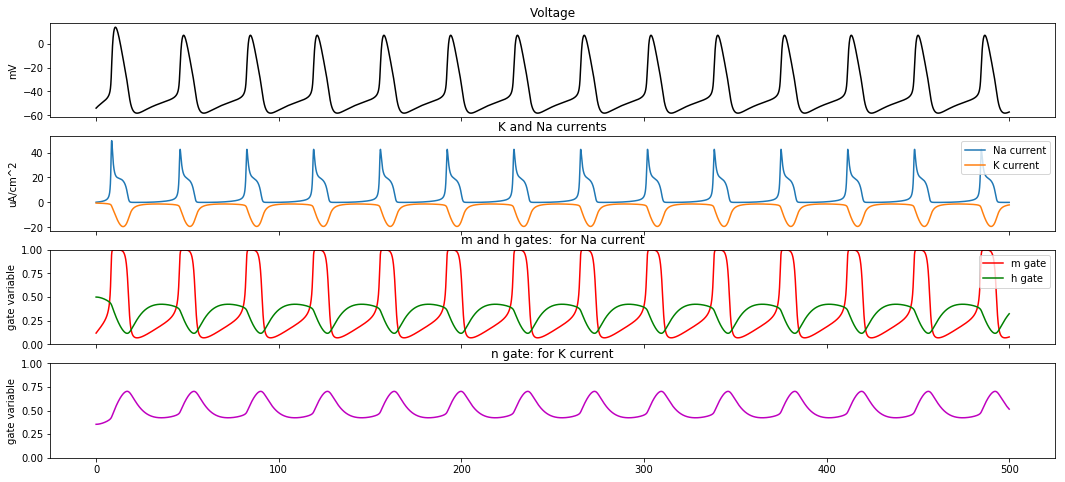

In [9]:
# simulation time
simtime=500  # in msec

dt=0.001  # msec
numsteps=np.round(simtime/dt).astype(int)
allV=np.zeros(numsteps)
alln=np.zeros(numsteps)

paramset=1
Iinput=2
# relevant ranges:
#  paramset1:  [0 to 4.  it starts saturating above that]
#  paramset2:  same

if paramset==1:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.2,50,-77,-45,15,10
elif paramset==2:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.35,65,-90,-40,5,10
elif paramset==3:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 0.25,0.012,30,-77,-44,10,50
else:
    print("wrong paramset number! \n")

allV[0]=Eleak
alln[0]=n_inf(allV[0],Vn,kn)
    
for step in range(1,numsteps):
    hgate = 0.89-1.1*alln[step-1]
    INa = -GNa*m_inf(allV[step-1])**3*hgate*(allV[step-1]-ENa)
    IK = -GK*alln[step-1]**4*(allV[step-1]-EK)
    Ileak = -Gleak*(allV[step-1]-Eleak)
    allV[step] = allV[step-1] + dt/Cap*(INa+IK+Ileak+Iinput)
    alln[step] = alln[step-1] + dt/tau*(n_inf(allV[step-1],Vn,kn)-alln[step-1])

    
## MAKE PLOTS
tvalues=np.arange(numsteps)*dt

allh=0.89-1.1*alln  # can calculate this, because giving it same dynamics as the n variable
allm_inf = m_inf(allV)
allINa = -GNa*allm_inf**3*allh*(allV-ENa)
allIK = IK = -GK*alln**4*(allV-EK)
allIleak = -Gleak*(allV-Eleak)

fig,ax=plt.subplots(4,1,sharex=True)
fig.set_size_inches((18,8))
# voltage
ax[0].plot(tvalues,allV,color='k')
ax[0].set_title('Voltage')
ax[0].set_ylabel('mV')
# K and Na currents
ax[1].plot(tvalues,allINa,label='Na current')
ax[1].plot(tvalues,allIK,label='K current')
ax[1].set_title('K and Na currents')
ax[1].legend(loc="upper right") 
ax[1].set_ylabel('uA/cm^2')
# Gating variables
# m and h - for Na
ax[2].plot(tvalues,allm_inf,label='m gate',color='r')
ax[2].plot(tvalues,allh,label='h gate',color='g')
ax[2].set_title('m and h gates:  for Na current')
ax[2].legend(loc="upper right")
ax[2].set_ylabel('gate variable')
ax[2].set_ylim([0,1])
# n - for K
ax[3].plot(tvalues,alln,color='m')
ax[3].set_title('n gate: for K current')
ax[3].set_ylabel('gate variable')
ax[3].set_ylim([0,1])

plt.show()
